# CSE -221710302064 - Vishnu Pulipaka

# Assignment Problem Statement:

This data is about the amount spent on advertising through different channels like TV, Radio and Newspaper. The goal is to predict how the expense on each channel affects the sales and is there a way to optimise that sale?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/Advertising.csv",index_col=0)
df.head(3)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3


1. Perform all the necessary data preprocessing steps required
2. Visualize the relationship between the features and the response using scatterplots
3. Check for correlation and observe if there is  any multicollinearity.
4. After building a Linear Regression Model, write down the interpretation of the model
5. Find out how well does the model fit the data?



## missing values

In [6]:
df.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

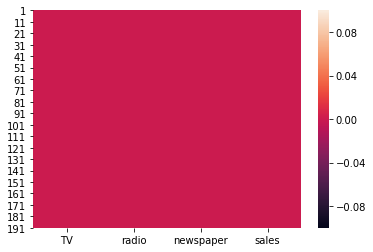

In [11]:
sns.heatmap(df.isna())

No missing values found

## duplicate values

In [7]:
df[df.duplicated()]

,TV,radio,newspaper,sales


No duplicate values formed

In [8]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


In [10]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## Visualising input columns using scatterplot

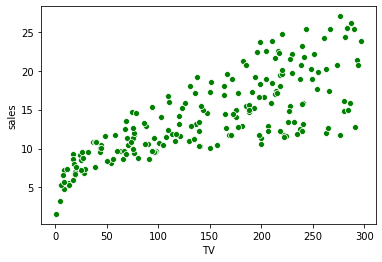

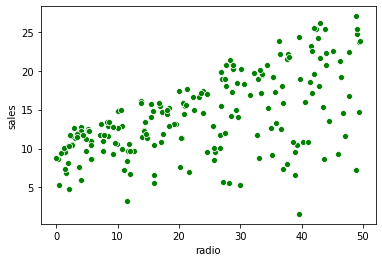

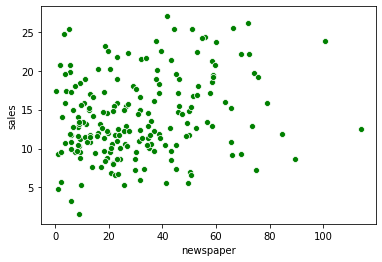

In [21]:
col=df.columns.to_list()[0:3]
col
for i in col:
    p=sns.scatterplot(x=i,y='sales',data=df,color='green')
    plt.show()

## Check for correlation and observe if there is  any multicollinearity.

In [22]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


- input columns do are not strongly collinear
- hence can be used as input for multilinear regression

In [38]:
X=df.drop(['sales'],axis=1)
y=df['sales']

1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
       ... 
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: sales, Length: 200, dtype: float64

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

In [34]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
## predicting on training data
y_train_pred=lr.predict(X_train)
y_train_pred

array([ 3.65921577,  7.25612637,  6.00481636, 18.46169785,  8.37406584,
       14.12454209, 15.0161764 , 20.40205426, 20.61382233, 19.61731651,
       24.16323248, 14.88403603,  6.73108467, 19.86205547, 18.92113796,
       12.49612522, 14.17816602,  6.11982211, 15.33821244,  9.59951578,
       12.04789746, 12.04846338,  8.52368581, 21.61141557, 23.30426145,
       12.24026439,  6.68855681, 17.80465348, 16.50075138,  8.78138524,
       20.39682769, 20.67376942, 24.24311844, 10.16119323, 10.51556751,
       16.43194712, 10.46014901,  6.66787113, 21.36473141, 14.43134771,
       15.49693622, 10.09789459, 14.96838524, 13.86965306,  8.38839734,
        8.85070713, 10.14373392,  8.16326623, 17.03095529, 15.20888698,
       16.80513965, 23.24354445, 13.44178745,  9.88629559, 18.11788026,
       14.82702155,  5.393657  , 12.87619027, 11.91409761, 12.09709362,
       11.73318833, 14.99985124,  4.60082043, 16.36095126, 12.08805647,
       17.79795119, 15.41316291, 18.63426135, 11.5184553 , 13.89

In [30]:
# Checking Performance on traning data
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print('R^2 :', r2_score(y_train,y_train_pred))
print('Adjusted R^2 :',1 - (1 - r2_score(y_train,y_train_pred))*(len(X_train)-1)/(len(X_train)-X_train.shape[1]-1) )
print('MAE:', mean_absolute_error(y_train, y_train_pred))
print('MSE:', mean_squared_error(y_train, y_train_pred))
print('RMSE', np.sqrt(mean_squared_error(y_train, y_train_pred)))

R^2 : 0.8959372632325174
Adjusted R^2 : 0.8939360567562197
MAE: 1.328850246099838
MSE: 3.0168306076596774
RMSE 1.736902590147092


In [31]:
# Test the model on testing data
y_test_pred = lr.predict(X_test)
y_test_pred

array([21.73577184, 16.45693776,  7.65993185, 17.89202679, 18.67730671,
       23.86271904, 16.33623628, 13.45649226,  9.177296  , 17.36056228,
       14.4677995 ,  9.85697601, 17.26057027, 16.71866935, 15.09530285,
       15.58923732, 12.45188167, 17.27925151, 11.0944114 , 18.06889853,
        9.33433055, 12.91345761,  8.7842804 , 10.46670654, 11.40303174,
       15.03104665,  9.78479388, 19.46028647, 18.22954934, 17.1958903 ,
       21.60304218, 14.71901407, 16.29205532, 12.36432281, 19.98831261,
       15.37556411, 13.96678297, 10.06809496, 20.97197274,  7.45877832])

In [32]:
# Performance of Testing data
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print('R^2 :', r2_score(y_test,y_test_pred))
print('Adjusted R^2 :',1 - (1 - r2_score(y_test,y_test_pred))*(len(X_test)-1)/(len(X_test)-X_test.shape[1]-1) )
print('MAE:', mean_absolute_error(y_test, y_test_pred))
print('MSE:', mean_squared_error(y_test, y_test_pred))
print('RMSE', np.sqrt(mean_squared_error(y_test, y_test_pred)))

R^2 : 0.8927605914615384
Adjusted R^2 : 0.8838239740833332
MAE: 1.0402154012924716
MSE: 1.99188555182879
RMSE 1.4113417558581585


## Conclusion:
- model predicts correct values 89.276 % 